# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$\frac{\partial u(0,t)}{\partial x}=\frac{\partial u(1,t)}{\partial x}=0, \;\;\; t>0$$
Y la condición inicial:
$$ \begin{equation} u(x,0) = 
\begin{matrix}-2,\ si\ 0<x\le\frac{1}{2}\\
0,\ si\ \frac{1}{2}<x<1\\
\end{matrix}.
\end{equation} $$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=-1-\frac{4}{\pi}\sum_{n=1}^{\infty} \frac{sen(\frac{n \pi}{2})}{n}  \cos(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Graficando condicion inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if(x[i]<=1/2):
          y[i]=-2
          if (x[i]>1/2) and (x[i]<1):
            y[i]=0
    return y

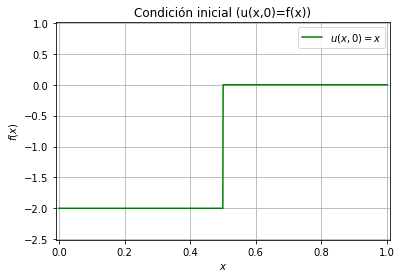

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$',color="g")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-2.51,1.01]),grid(),legend()
show()

Aproximando condicion inicial con series de fourirer $u(x,0)=f(x)=
  \begin{matrix}-2,\ si\ 0<x\le\frac{1}{2}\\
  0,\ si\ \frac{1}{2}<x<1\\
  \end{matrix}.$.

In [ ]:
def u_0(x,N=30): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (sin((n*pi)/(2))*cos(n*pi*x))/(n)
    return (-1.0-(4.0/pi)*f)

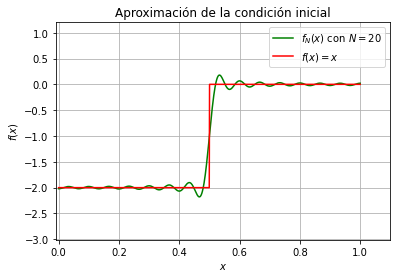

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$',color="g")
plot(x,f,label='$f(x)=x$',color="r")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-3.01,1.2]),grid(),legend()
show()

Visualizando aproximacion para armonicos diferentes.

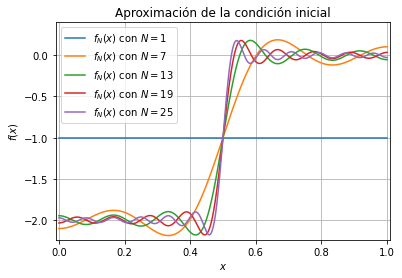

In [ ]:
for i in range(1,30,6):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.24,0.4]),grid(),legend()
show()

Se agrega el tiempo para tener la solucion completa. Primero, para: $t=0$.

In [ ]:
def u_x_t(x,t,N=100):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (sin((n*pi)/(2))*cos(n*pi*x))/(n)*exp(-n**2*pi**2*t[i])
    return (-1.0-(4.0/pi)*f)

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

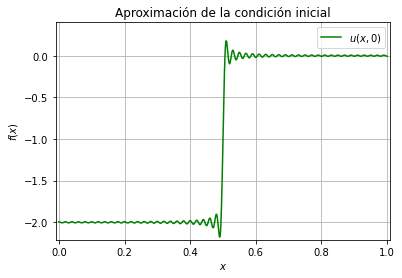

In [ ]:
plot(x,U[:,0],label='$u(x,0)$',color="g")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.21,0.4]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

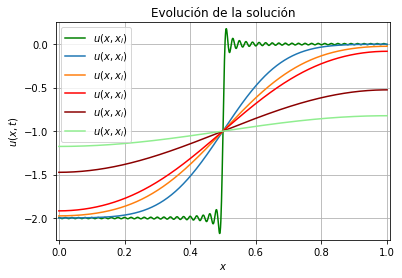

In [ ]:
plot(x,U[:,0],label='$u(x,x_i)$',color="g") 
plot(x,U[:,1],label='$u(x,x_i)$')
plot(x,U[:,2],label='$u(x,x_i)$')
plot(x,U[:,3],label='$u(x,x_i)$',color="r")
plot(x,U[:,10],label='$u(x,x_i)$',color="darkred")
plot(x,U[:,20],label='$u(x,x_i)$',color="lightgreen")
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.25,0.25]),grid(),legend()
show()

Grafica 3D.

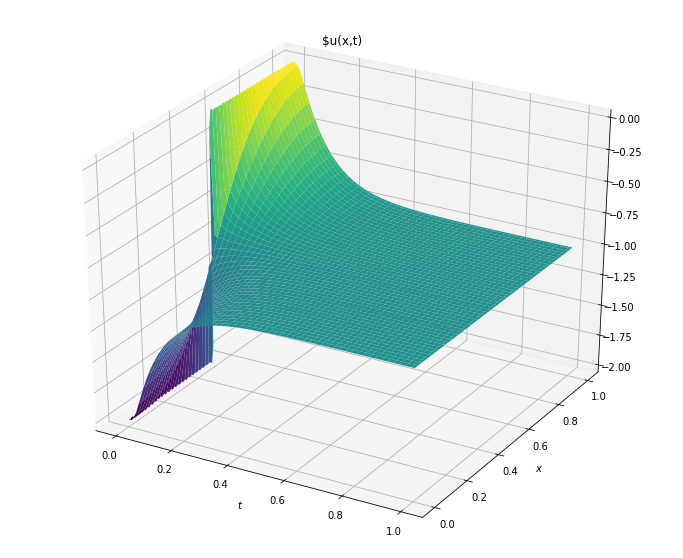

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title('$u(x,t)')
ax.plot_surface(X, T, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"